In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def draw_trajectory(transforms_path, ax, color='r', size=20):
    plt.style.use('seaborn-whitegrid')
    legend_flag = False

    with open(transforms_path, 'r', encoding='utf-16') as json_file:
        contents = json.load(json_file)
        fovx = contents["camera_angle_x"]
        frames = contents["Frames"]

        for idx, frame in enumerate(frames):
            if idx % 60 != 0:
                continue
            file_path = os.path.split(frame['file_path'])[-1]
            # transform a to list
            c2w = frame['transform_matrix']
            c2w = c2w.replace('[', '').replace(']', '').replace(',', '').split(' ')
            c2w = [float(i) for i in c2w if i != '']
            c2w = np.array(c2w).reshape(4, 4).T
            c2w[:3, 3] = c2w[:3, 3] / 100  # cm to m

            pos = c2w[:3, 3]  # camera center position
            x_dir = c2w[:3, 0] / (np.linalg.norm(c2w[:3, 0]) + 1e-8)
            y_dir = c2w[:3, 1] / (np.linalg.norm(c2w[:3, 1]) + 1e-8)
            z_dir = c2w[:3, 2] / (np.linalg.norm(c2w[:3, 2]) + 1e-8)
            a = pos + size * x_dir + size * y_dir + size * z_dir
            b = pos - size * x_dir + size * y_dir + size * z_dir
            c = pos - size * x_dir - size * y_dir + size * z_dir
            d = pos + size * x_dir - size * y_dir + size * z_dir

            dir = (a + b + c + d) / 4 - pos  # camera view direction, i.e. z-axis
            dir = dir / (np.linalg.norm(dir) + 1e-8)
            o = pos + dir * 3

            ax.arrow(pos[1], pos[0], size * x_dir[1], size * x_dir[0], color='r', head_width=size/2, label='x-axis')
            ax.arrow(pos[1], pos[0], size * y_dir[1], size * y_dir[0], color='g', head_width=size/2, label='y-axis')
            # ax.arrow(pos[2], pos[0], size * z_dir[2], size * z_dir[0], color='b', head_width=size/20000, label='z-axis')
            if not legend_flag:
                ax.legend()
                legend_flag = True

    ax.axis('equal')
    ax.set_xlabel('z/m')
    ax.set_ylabel('x/m')

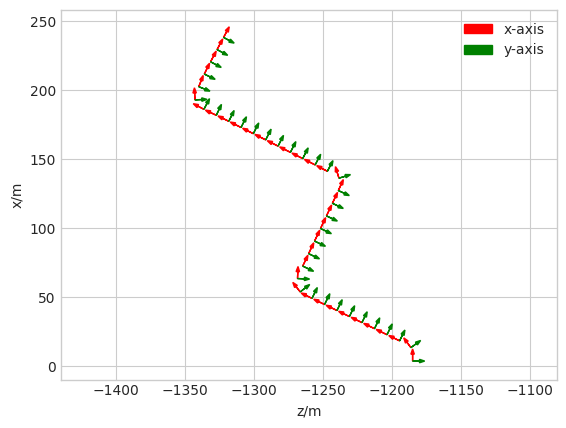

In [5]:
data_path, subset = '../data/UE-collected', 'vehicle-train-20231114'
transforms_path = os.path.join(data_path, subset, 'transforms.json')
fig = plt.figure()
ax = fig.gca()
draw_trajectory(transforms_path, ax, color='r', size=5)
plt.show()

In [7]:
transforms_path_ref = os.path.join(data_path, subset, 'transforms_ref.json')
out_contents = {}
with open(transforms_path_ref) as json_file:
    ref_contents = json.load(json_file)
with open(transforms_path, 'r', encoding='utf-16') as json_file:
    contents = json.load(json_file)
    contents['Sensor_Width'] = 23.76  # mm
    contents['Sensor_Height'] = 13.365  # mm
    contents['Current_Focal_Length'] = 11.8  # mm
    contents['camera_angle_x'] = 90.387123 * np.pi / 180  # degree to rad

# initialize out_contents with the same keys as ref_contents
for key in ref_contents.keys():
    if key == 'frames':
        out_contents[key] = []
    else:
        out_contents[key] = 0

out_contents['camera_angle_x'] = contents['camera_angle_x']
out_contents['cx'] = contents['cx']
out_contents['cy'] = contents['cy']
out_contents['w'] = contents['w']
out_contents['h'] = contents['h']
out_contents['fl_x'] = contents['w'] / contents['Sensor_Width'] * contents['Current_Focal_Length']
out_contents['fl_y'] = contents['h'] / contents['Sensor_Height'] * contents['Current_Focal_Length']
camera_angle_x = np.arctan(0.5 * contents['Sensor_Width'] / contents['Current_Focal_Length']) * 2

frames = contents["Frames"]
for idx, frame in enumerate(frames):
    c2w = frame['transform_matrix']
    c2w = c2w.replace('[', '').replace(']', '').replace(',', '').split(' ')
    c2w = [float(i) for i in c2w if i != '']
    c2w = np.array(c2w).reshape(4, 4).T
    c2w[:3, 3] = c2w[:3, 3] / 100  # cm to m
    file_path = os.path.join('UE-collected', subset, os.path.split(frame['file_path'])[-1])
    out_contents['frames'].append({'file_path': file_path, 'transform_matrix': c2w.tolist()})

print('Here')

Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
Here
